# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("7759b97233d615c2b8c1720d79365f29")

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #
    city_url = f"{url}q={city}&appid='14a42ceda062bd74e10746552e582954'"
    # city_url = f"{url}q={city}&appid="14a42ceda062bd74e10746552e582954"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_data['coord']['lat'],city_lng
        city_lng = city_data['coord']['lon']
        city_max_temp = city_data['main']['temp_max']
        city_humidity = city_data['main']['humidity']
        city_clouds = city_data['clouds']['all']
        city_wind = city_data['wind']['speed']
        city_country = city_data['sys']['country']
        city_date = city_data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
7759b97233d615c2b8c1720d79365f29
Processing Record 1 of Set 1 | ahau
City not found. Skipping...
Processing Record 2 of Set 1 | west island
City not found. Skipping...
Processing Record 3 of Set 1 | atafu village
City not found. Skipping...
Processing Record 4 of Set 1 | bethel
City not found. Skipping...
Processing Record 5 of Set 1 | puerto armuelles
City not found. Skipping...
Processing Record 6 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 7 of Set 1 | jamestown
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
City not found. Skipping...
Processing Record 9 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 10 of Set 1 | olinda
City not found. Skipping...
Processing Record 11 of Set 1 | margaret river
City not found. Skipping...
Processing Record 12 of Set 1 | bilibino
City not found. Skipping...
Processing Record 13 of Set 1 | outjo
City not found. Skipping...
Processing Record 14 of Set 1 |

City not found. Skipping...
Processing Record 17 of Set 3 | ciudad bolivar
City not found. Skipping...
Processing Record 18 of Set 3 | guerrero negro
City not found. Skipping...
Processing Record 19 of Set 3 | san patricio
City not found. Skipping...
Processing Record 20 of Set 3 | khanty-mansiysk
City not found. Skipping...
Processing Record 21 of Set 3 | port mathurin
City not found. Skipping...
Processing Record 22 of Set 3 | nishinoomote
City not found. Skipping...
Processing Record 23 of Set 3 | tianshui
City not found. Skipping...
Processing Record 24 of Set 3 | tiksi
City not found. Skipping...
Processing Record 25 of Set 3 | mbandjok
City not found. Skipping...
Processing Record 26 of Set 3 | ellsworth
City not found. Skipping...
Processing Record 27 of Set 3 | georgetown
City not found. Skipping...
Processing Record 28 of Set 3 | south hedland
City not found. Skipping...
Processing Record 29 of Set 3 | villa gesell
City not found. Skipping...
Processing Record 30 of Set 3 | ha

City not found. Skipping...
Processing Record 36 of Set 5 | fale old settlement
City not found. Skipping...
Processing Record 37 of Set 5 | happy valley-goose bay
City not found. Skipping...
Processing Record 38 of Set 5 | ust-nera
City not found. Skipping...
Processing Record 39 of Set 5 | hithadhoo
City not found. Skipping...
Processing Record 40 of Set 5 | fort st. john
City not found. Skipping...
Processing Record 41 of Set 5 | hawaiian paradise park
City not found. Skipping...
Processing Record 42 of Set 5 | usinsk
City not found. Skipping...
Processing Record 43 of Set 5 | xining
City not found. Skipping...
Processing Record 44 of Set 5 | toga village
City not found. Skipping...
Processing Record 45 of Set 5 | kindu
City not found. Skipping...
Processing Record 46 of Set 5 | walvis bay
City not found. Skipping...
Processing Record 47 of Set 5 | vallenar
City not found. Skipping...
Processing Record 48 of Set 5 | hirara
City not found. Skipping...
Processing Record 49 of Set 5 | a

City not found. Skipping...
Processing Record 5 of Set 8 | kingston
City not found. Skipping...
Processing Record 6 of Set 8 | impfondo
City not found. Skipping...
Processing Record 7 of Set 8 | polyarnyy
City not found. Skipping...
Processing Record 8 of Set 8 | san lawrenz
City not found. Skipping...
Processing Record 9 of Set 8 | afaahiti
City not found. Skipping...
Processing Record 10 of Set 8 | harper
City not found. Skipping...
Processing Record 11 of Set 8 | joetsu
City not found. Skipping...
Processing Record 12 of Set 8 | port blair
City not found. Skipping...
Processing Record 13 of Set 8 | egilsstadir
City not found. Skipping...
Processing Record 14 of Set 8 | pervomayskoye
City not found. Skipping...
Processing Record 15 of Set 8 | neiafu
City not found. Skipping...
Processing Record 16 of Set 8 | tsengel
City not found. Skipping...
Processing Record 17 of Set 8 | grand falls-windsor
City not found. Skipping...
Processing Record 18 of Set 8 | kapa'a
City not found. Skippin

City not found. Skipping...
Processing Record 24 of Set 10 | alotau
City not found. Skipping...
Processing Record 25 of Set 10 | boyolangu
City not found. Skipping...
Processing Record 26 of Set 10 | miandrivazo
City not found. Skipping...
Processing Record 27 of Set 10 | las tablas
City not found. Skipping...
Processing Record 28 of Set 10 | ormara
City not found. Skipping...
Processing Record 29 of Set 10 | bayanhongor
City not found. Skipping...
Processing Record 30 of Set 10 | mutoko
City not found. Skipping...
Processing Record 31 of Set 10 | canete
City not found. Skipping...
Processing Record 32 of Set 10 | antofagasta
City not found. Skipping...
Processing Record 33 of Set 10 | tvoroyri
City not found. Skipping...
Processing Record 34 of Set 10 | dzuunharaa
City not found. Skipping...
Processing Record 35 of Set 10 | kaohsiung
City not found. Skipping...
Processing Record 36 of Set 10 | bengkulu
City not found. Skipping...
Processing Record 37 of Set 10 | coron
City not found. 

City not found. Skipping...
Processing Record 41 of Set 12 | matoury
City not found. Skipping...
Processing Record 42 of Set 12 | coxen hole
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Define the path to the CSV file
file_path = 'output_data/cities.csv'

# Read the CSV file into a DataFrame
cities_df = pd.read_csv(file_path)

# Display the DataFrame
cities_df.head()

,City_ID,City_ID.7,City_ID.6,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,0,0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Show Record Count
city_data_df.count()

City_ID       577
City_ID.7     577
City_ID.6     577
City_ID.5     577
City_ID.4     577
City_ID.3     577
City_ID.2     577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City_ID,City_ID.7,City_ID.6,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,0,0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.8,City_ID.7,City_ID.6,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

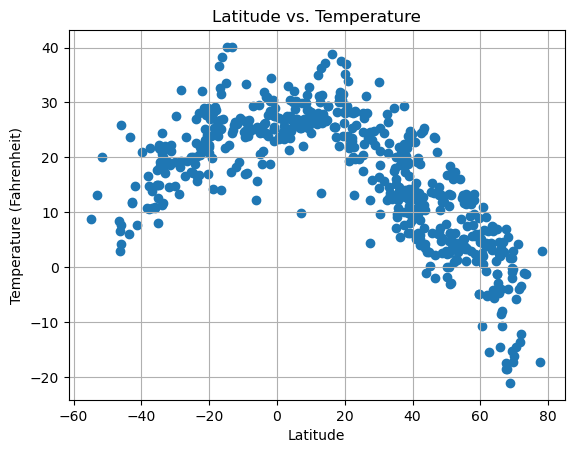

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

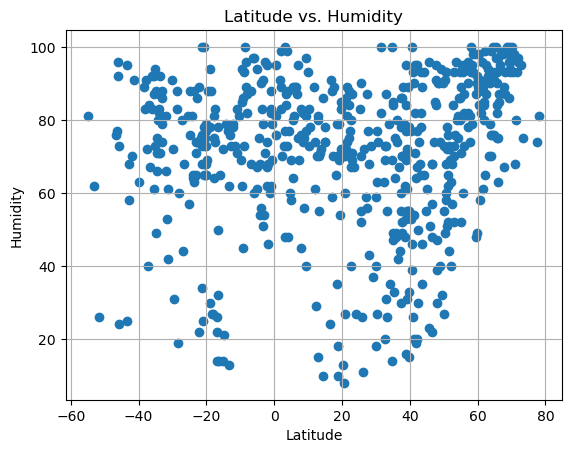

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

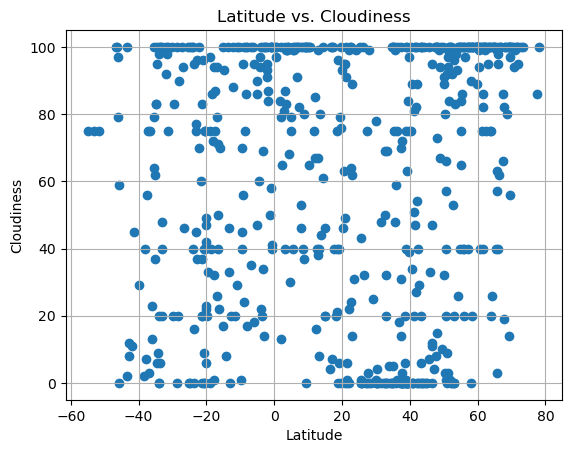

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

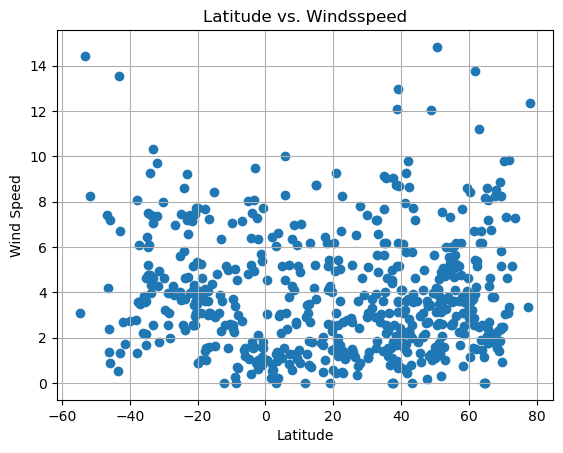

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Windsspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

city_data_df['Lat'] >= 0 

city_data_df[city_data_df['Lat'] >= 0] 

northern_hemi_df.head() 

# Display sample data
northern_hemi_df.head()

,City_ID.8,City_ID.7,City_ID.6,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,1,1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,3,3,3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,4,4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,6,6,6,6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

city_data_df['Lat'] >= 0 

city_data_df[city_data_df['Lat'] >= 0] 

southern_hemi_df.head() 

# Display sample data
southern_hemi_df.head()

,City_ID.8,City_ID.7,City_ID.6,City_ID.5,City_ID.4,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,,,,,,
2,2,2,2,2,2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,5,5,5,5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,7,7,7,7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,9,9,9,9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,10,10,10,10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

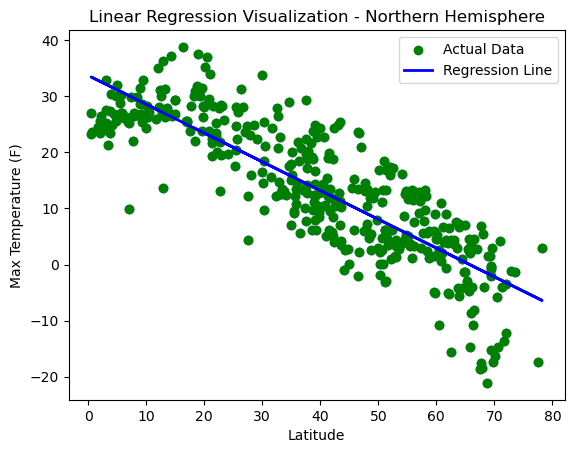

In [15]:
# with help from xpert

# Linear regression on Northern Hemisphere

from sklearn.linear_model import LinearRegression


# Filter the data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

X = northern_hemi_df["Lat"].values.reshape(-1, 1)  # Reshape X to a 2D array
y = northern_hemi_df["Max Temp"].values  # No need to reshape y for a single target variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Linear Regression Visualization - Northern Hemisphere')
plt.legend()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In the Northern Hemisphere the temperature rises as you approach 0 Latitude and falls as the Latitude approaches higher numbers.

### Humidity vs. Latitude Linear Regression Plot

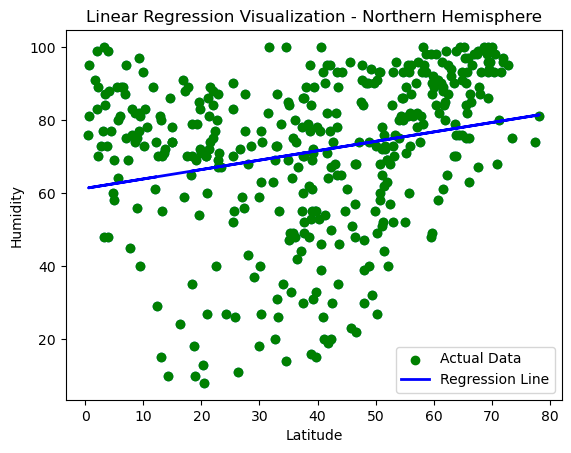

In [16]:
# Northern Hemisphere
# Filter the data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

X = northern_hemi_df["Lat"].values.reshape(-1, 1)
y = northern_hemi_df["Humidity"].values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression Visualization - Northern Hemisphere')
plt.legend()
plt.show()


In [ ]:
# A slight relationship between Humidity and Latitude

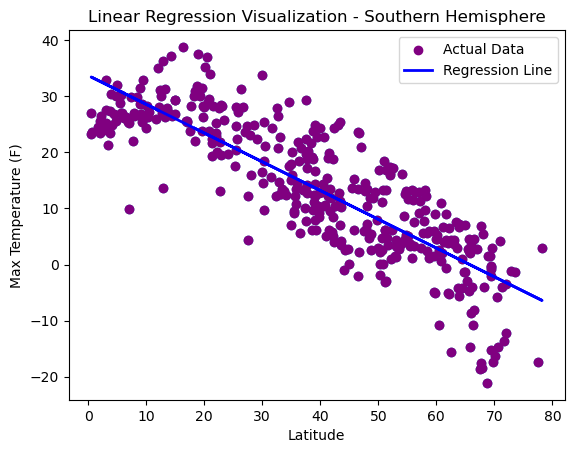

In [17]:
# Linear regression on Southern Hemisphere
# Filter the data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

X = southern_hemi_df["Lat"].values.reshape(-1, 1)
y = southern_hemi_df["Max Temp"].values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='purple', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Linear Regression Visualization - Southern Hemisphere')
plt.legend()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Very high relationship between Latitude and Temperature in the Southern Hemisphere. Temperature falls as the Latitude gets higher.

### Cloudiness vs. Latitude Linear Regression Plot

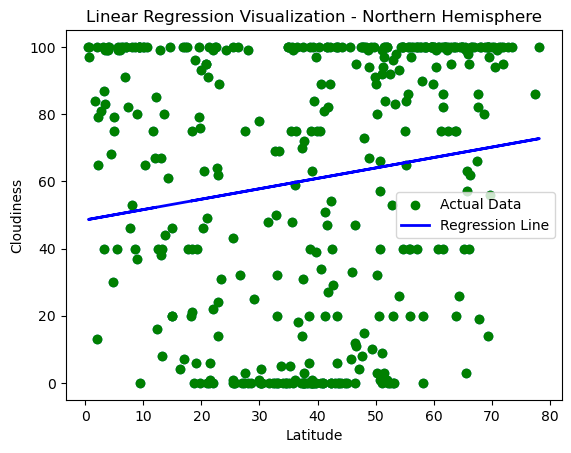

In [18]:
# Northern Hemisphere
# Filter the data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

X = northern_hemi_df["Lat"].values.reshape(-1, 1)
y = northern_hemi_df["Cloudiness"].values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression Visualization - Northern Hemisphere')
plt.legend()
plt.show()

In [ ]:
# No relationship between Latitude and Cloudiness. There are a lot of points near 0 and 100 for Cloudiness.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

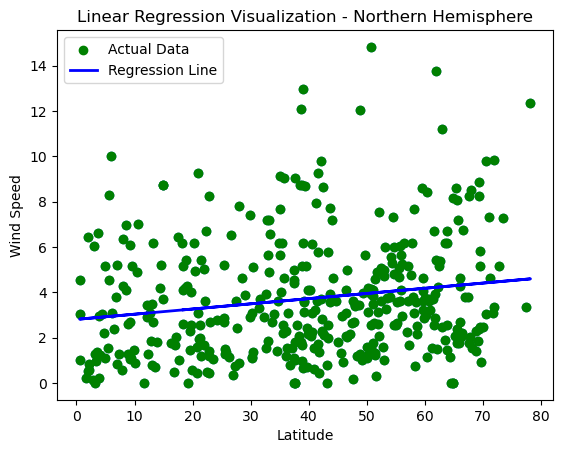

In [19]:
# Northern Hemisphere
# Filter the data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

X = northern_hemi_df["Lat"].values.reshape(-1, 1)
y = northern_hemi_df["Wind Speed"].values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression Visualization - Northern Hemisphere')
plt.legend()
plt.show()

In [ ]:
# No relationship between Windspeed and Latitude. There are some outliers on the high end.

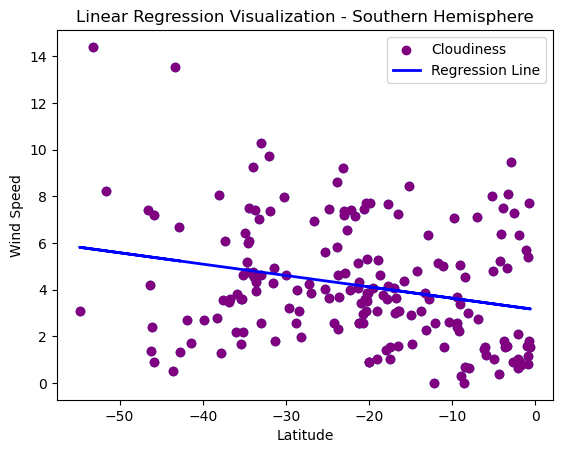

In [20]:
# Southern Hemisphere
# Filter the data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

X = southern_hemi_df["Lat"].values.reshape(-1, 1)
y = southern_hemi_df["Wind Speed"].values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='purple', label='Cloudiness')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression Visualization - Southern Hemisphere')
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# A very slight relationship between Wind Speed and Latitude. There are more points toward 0 Latitude with the rest pretty much all over and a couple outliers